<a href="https://colab.research.google.com/github/aaronmj7/MSc_project/blob/main/Project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

In [37]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Set seaborn theme
sns.set_theme()

## Load Data

In [54]:
# Load movies.csv
movies_df = pd.read_csv('/content/drive/MyDrive/ml-32m/movies.csv')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [55]:
# Load tags.csv
tags_df = pd.read_csv('/content/drive/MyDrive/ml-32m/tags.csv')
tags_df

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


In [56]:
# Load ratings.csv
ratings_df = pd.read_csv('/content/drive/MyDrive/ml-32m/ratings.csv')
ratings_df

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [57]:
# Load links.csv
links_df = pd.read_csv('/content/drive/MyDrive/ml-32m/links.csv')
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
87580,292731,26812510,1032473.0
87581,292737,14907358,986674.0
87582,292753,12388280,948139.0
87583,292755,64027,182776.0


## EDA

In [18]:
# Display more info

print(movies_df.info(), '\n')
print(tags_df.info(), '\n')
print(ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 61.0+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None


In [59]:
# Check null values
print(movies_df.isnull().sum(), '\n')
print(tags_df.isnull().sum(), '\n')
print(ratings_df.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64 

userId        0
movieId       0
tag          17
timestamp     0
dtype: int64 

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [60]:
# Get rows with null values
tags_df[tags_df['tag'].isnull()]

,userId,movieId,tag,timestamp
185377,27046,33826,NaN,1221450908
1394089,89369,281500,NaN,1670942104
1914668,153443,123,NaN,1199450867
1914669,153443,346,NaN,1199451946
1914673,153443,1184,NaN,1199452261
1914680,153443,1785,NaN,1199452006
1914681,153443,2194,NaN,1199450677
1914683,153443,2691,NaN,1199451002
1914691,153443,4103,NaN,1199451920
1914693,153443,4473,NaN,1199451040


In [65]:
# Drop null values
tags_df.dropna(inplace=True)

In [66]:
# Check shape
tags_df.shape

(2000055, 4)

In [13]:
# Describe statistical info
movies_df.describe()

,movieId
count,87585.000000
mean,157651.365519
std,79013.402099
min,1.000000
25%,112657.000000
50%,165741.000000
75%,213203.000000
max,292757.000000


In [12]:
# Describe statistical info
tags_df.describe()

,userId,movieId,timestamp
count,2.000072e+06,2.000072e+06,2.000072e+06
mean,8.192859e+04,7.189326e+04,1.528914e+09
std,3.810650e+04,7.480379e+04,1.290835e+08
min,2.200000e+01,1.000000e+00,1.135429e+09
25%,6.841300e+04,4.011000e+03,1.473615e+09
50%,7.821300e+04,5.232800e+04,1.574071e+09
75%,1.036980e+05,1.222940e+05,1.614740e+09
max,1.622790e+05,2.926290e+05,1.697155e+09


In [14]:
# Describe statistical info
ratings_df.describe()

,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


In [72]:
# Get value count of diferent genres
genre_count = movies_df['genres'].value_counts()
genre_count

,count
genres,
Drama,12443
Documentary,8132
Comedy,7761
(no genres listed),7080
Comedy|Drama,3245
...,...
Animation|Crime|Mystery|Sci-Fi|Thriller,1
Action|Comedy|Crime|Horror|Thriller,1
Adventure|Documentary|Drama|War,1


In [76]:
# Get all genres
all_genres = []
for genres in movies_df['genres']:
  all_genres.extend(genres.split('|'))

all_genres = pd.Series(all_genres)
all_genres.value_counts()

,count
Drama,34175
Comedy,23124
Thriller,11823
Romance,10369
Action,9668
Documentary,9363
Horror,8654
(no genres listed),7080
Crime,6976
Adventure,5402


In [ ]:
# Get value count of diferent tags
tags_df['tag'].value_counts()

,count
tag,
sci-fi,10996
atmospheric,9589
action,8473
comedy,8139
funny,7467
...,...
bad behavior,1
apache junction arizona,1
advent calendar,1


In [24]:
# Get value count of diferent ratings
rating_count = ratings_df['rating'].value_counts().sort_index()
rating_count

,count
rating,
0.5,525132
1.0,946675
1.5,531063
2.0,2028622
2.5,1685386
3.0,6054990
3.5,4290105
4.0,8367654
4.5,2974000


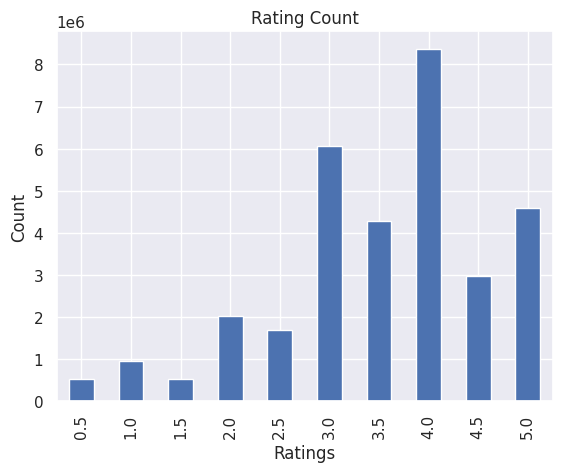

In [45]:
# Plot rating count
rating_count.plot(kind='bar')
plt.title('Rating Count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

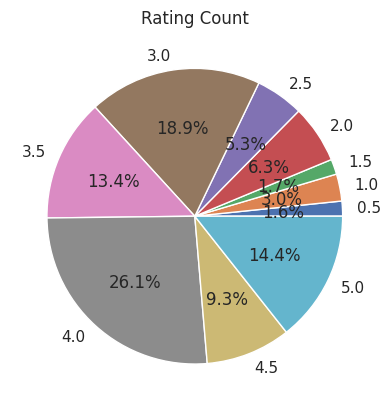

In [46]:
# Plot pie chart of rating count
rating_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Rating Count')
plt.ylabel('')
plt.show()

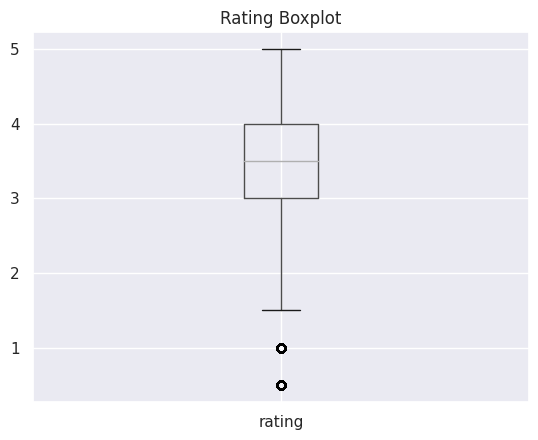

In [67]:
# Plot rating boxplot
ratings_df.boxplot(column='rating')
plt.title('Rating Boxplot')
plt.show()

## Data Pre-processing

In [83]:
# Calculate the average rating for each movie
average_ratings_df = ratings_df.groupby('movieId')['rating'].mean()

# Rename columns
average_ratings_df.columns = ['movieId', 'average_rating']

# Display average ratings
average_ratings_df

,rating
movieId,
1,3.897438
2,3.275758
3,3.139447
4,2.845331
5,3.059602
...,...
292731,4.000000
292737,1.500000
292753,4.000000


In [84]:
average_ratings_df.describe()

,rating
count,84432.000000
mean,3.005082
std,0.801820
min,0.500000
25%,2.543478
50%,3.071429
75%,3.500000
max,5.000000


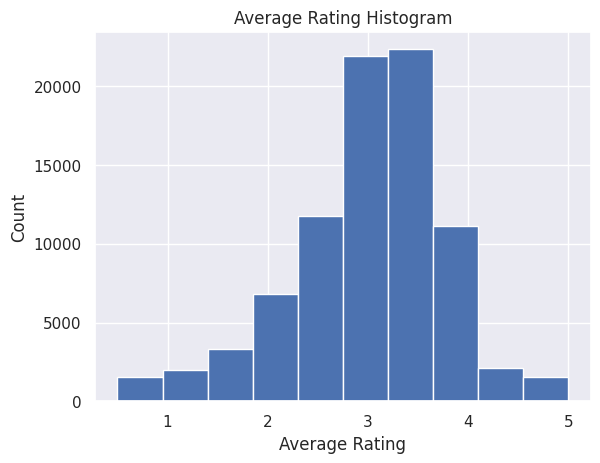

In [86]:
# Plot
average_ratings_df.plot(kind='hist', bins=10)
plt.title('Average Rating Histogram')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()